<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.datasets import make_moons

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
from sklearn.model_selection import train_test_split as tts

In [46]:
make_moons(n_samples=5,noise=0.25)

(array([[ 0.78256814, -0.64959553],
        [-0.79975778, -0.13645145],
        [-0.23096653,  0.27653735],
        [ 2.10873133,  0.59311046],
        [ 1.20012759, -0.15706236]]), array([1, 0, 1, 1, 0]))

In [47]:
X,y=make_moons(n_samples=1000,noise=0.25)

In [48]:
X

array([[ 0.27686977, -0.27484695],
       [ 1.86872419,  0.28409429],
       [ 0.86492221,  0.43689939],
       ...,
       [ 1.36644032,  0.12508592],
       [-0.38263416,  1.17984963],
       [ 1.21733569,  0.40371293]])

In [49]:
X_train,X_test,y_train,y_test=tts(X,y,stratify=y)

In [50]:
bg=BaggingClassifier(n_estimators=25)

In [51]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=25,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [52]:
pip install mglearn

In [53]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
import matplotlib.pyplot as plt

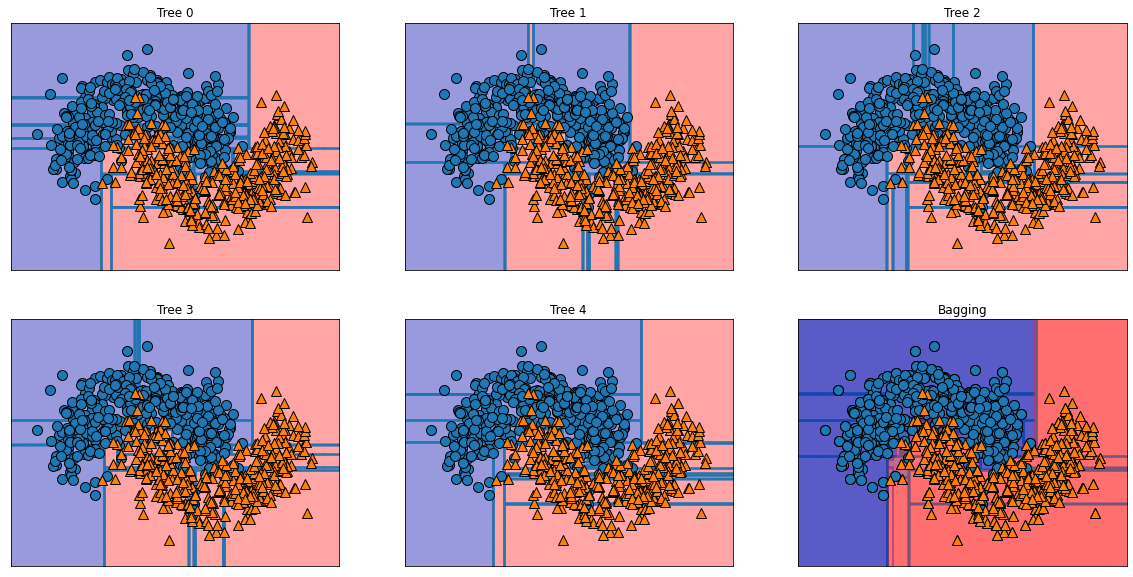

In [54]:
fig,axes=plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),bg.estimators_)):
  ax.set_title("Tree {}".format(i))
  plot_tree_partition(X_train,y_train,tree,ax=ax)
plot_2d_separator(bg,X_train,fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

In [55]:
prediction=bg.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print("acc:{:.2%}".format(accuracy_score(y_test,prediction)))

acc:92.00%


La particularité de Bagging est qu'il est capable de combiner plus plusieurs estimaeurs afin d'être la meilleur possible

In [58]:
error=[]
for i in range(1,100):
  bagging=BaggingClassifier(n_estimators=i)
  bagging.fit(X_train,y_train)
  y_pred=bagging.predict(X_test)
  error.append(1-accuracy_score(y_pred,y_test))


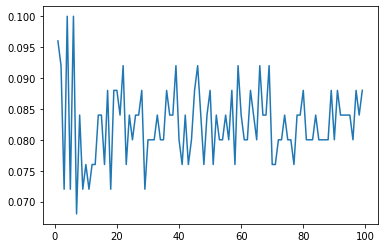

In [59]:
x=range(1,100)
plt.plot(x,error)
plt.show()

In [60]:
a=(error==min(error))
a

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [61]:
b=error.index(min(error))

In [62]:
bagging=BaggingClassifier(n_estimators=b)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

acc:90.80%


In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
neighbor=KNeighborsClassifier(n_neighbors=1)
neighbor.fit(X_test,y_test)
y_pred=neighbor.predict(X_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

acc:100.00%


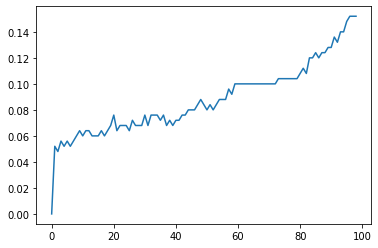

In [65]:
errorN=[]
for i in range(1,100):
  neighbor=KNeighborsClassifier(n_neighbors=i)
  neighbor.fit(X_test,y_test)
  y_pred=neighbor.predict(X_test)
  errorN.append(1-accuracy_score(y_test,y_pred))

plt.plot(errorN)
#errorN.index(min(errorN))